In [1]:
# **Descriptive Statistical Analysis

# The describe function automatically computes basic statistics for all continous
# variables. Any NaN values are automatically skipped in these statistics.

# This will show:
#     Count of the variable
#     Mean
#     Standard deviation(std)
#     Minimum value 
#     IQR = Q3 - Q1 (Tnterquartile Range: 25%,50% and 75%)
#     Maximum value 
    
# apply the method "describe" as follows:**

In [2]:
import pandas as pd               
import numpy as np                 

In [3]:
%%capture 
! pip install seaborn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
df = pd.read_csv("Suicides_in_India.csv")
df.head()

,index,State,Year,Type_code,Type,Gender,Age_group,Total
0,0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0


In [6]:
#It is used to show the number of rows and columns
df.shape

(237519, 8)

In [7]:
#checks if the null value are available or not
df.isna().sum()

index        0
State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [8]:
#to check if any duplications are available or not  
df.duplicated().sum()

0

In [9]:
stat = df.describe()
stat

,index,Year,Total
count,237519.000000,237519.000000,237519.000000
mean,118759.000000,2006.500448,55.034477
std,68565.973631,3.452240,792.749038
min,0.000000,2001.000000,0.000000
25%,59379.500000,2004.000000,0.000000
50%,118759.000000,2007.000000,0.000000
75%,178138.500000,2010.000000,6.000000
max,237518.000000,2012.000000,63343.000000


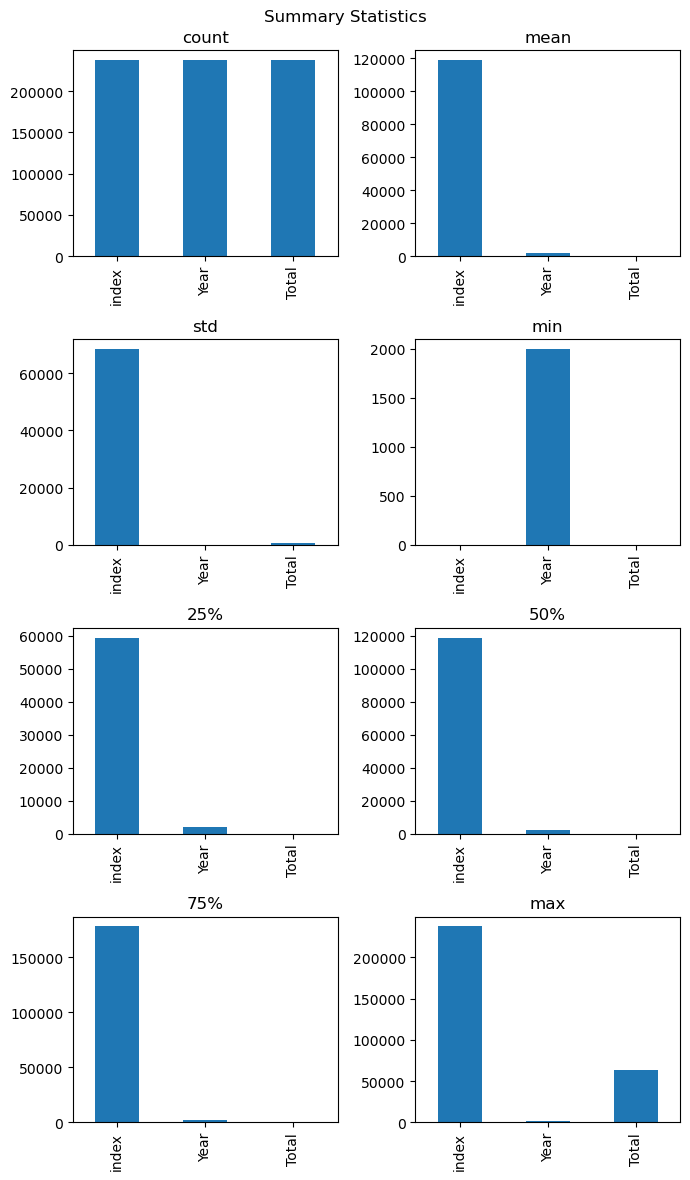

In [10]:
# Transpose the DataFrame for easier plotting
stat = stat.T

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(7, 12))
fig.suptitle('Summary Statistics')
for i, (col, ax) in enumerate(zip(stat.columns, axes.flatten())):
    stat[col].plot(kind='bar', ax=ax, title=col)

# Adjust layout
plt.tight_layout()
plt.show()

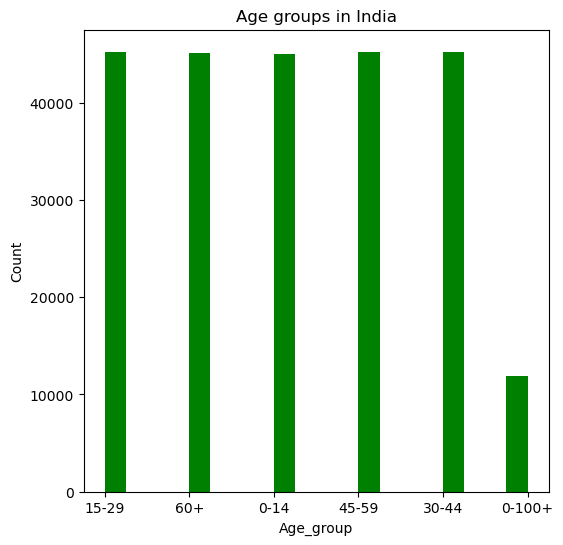

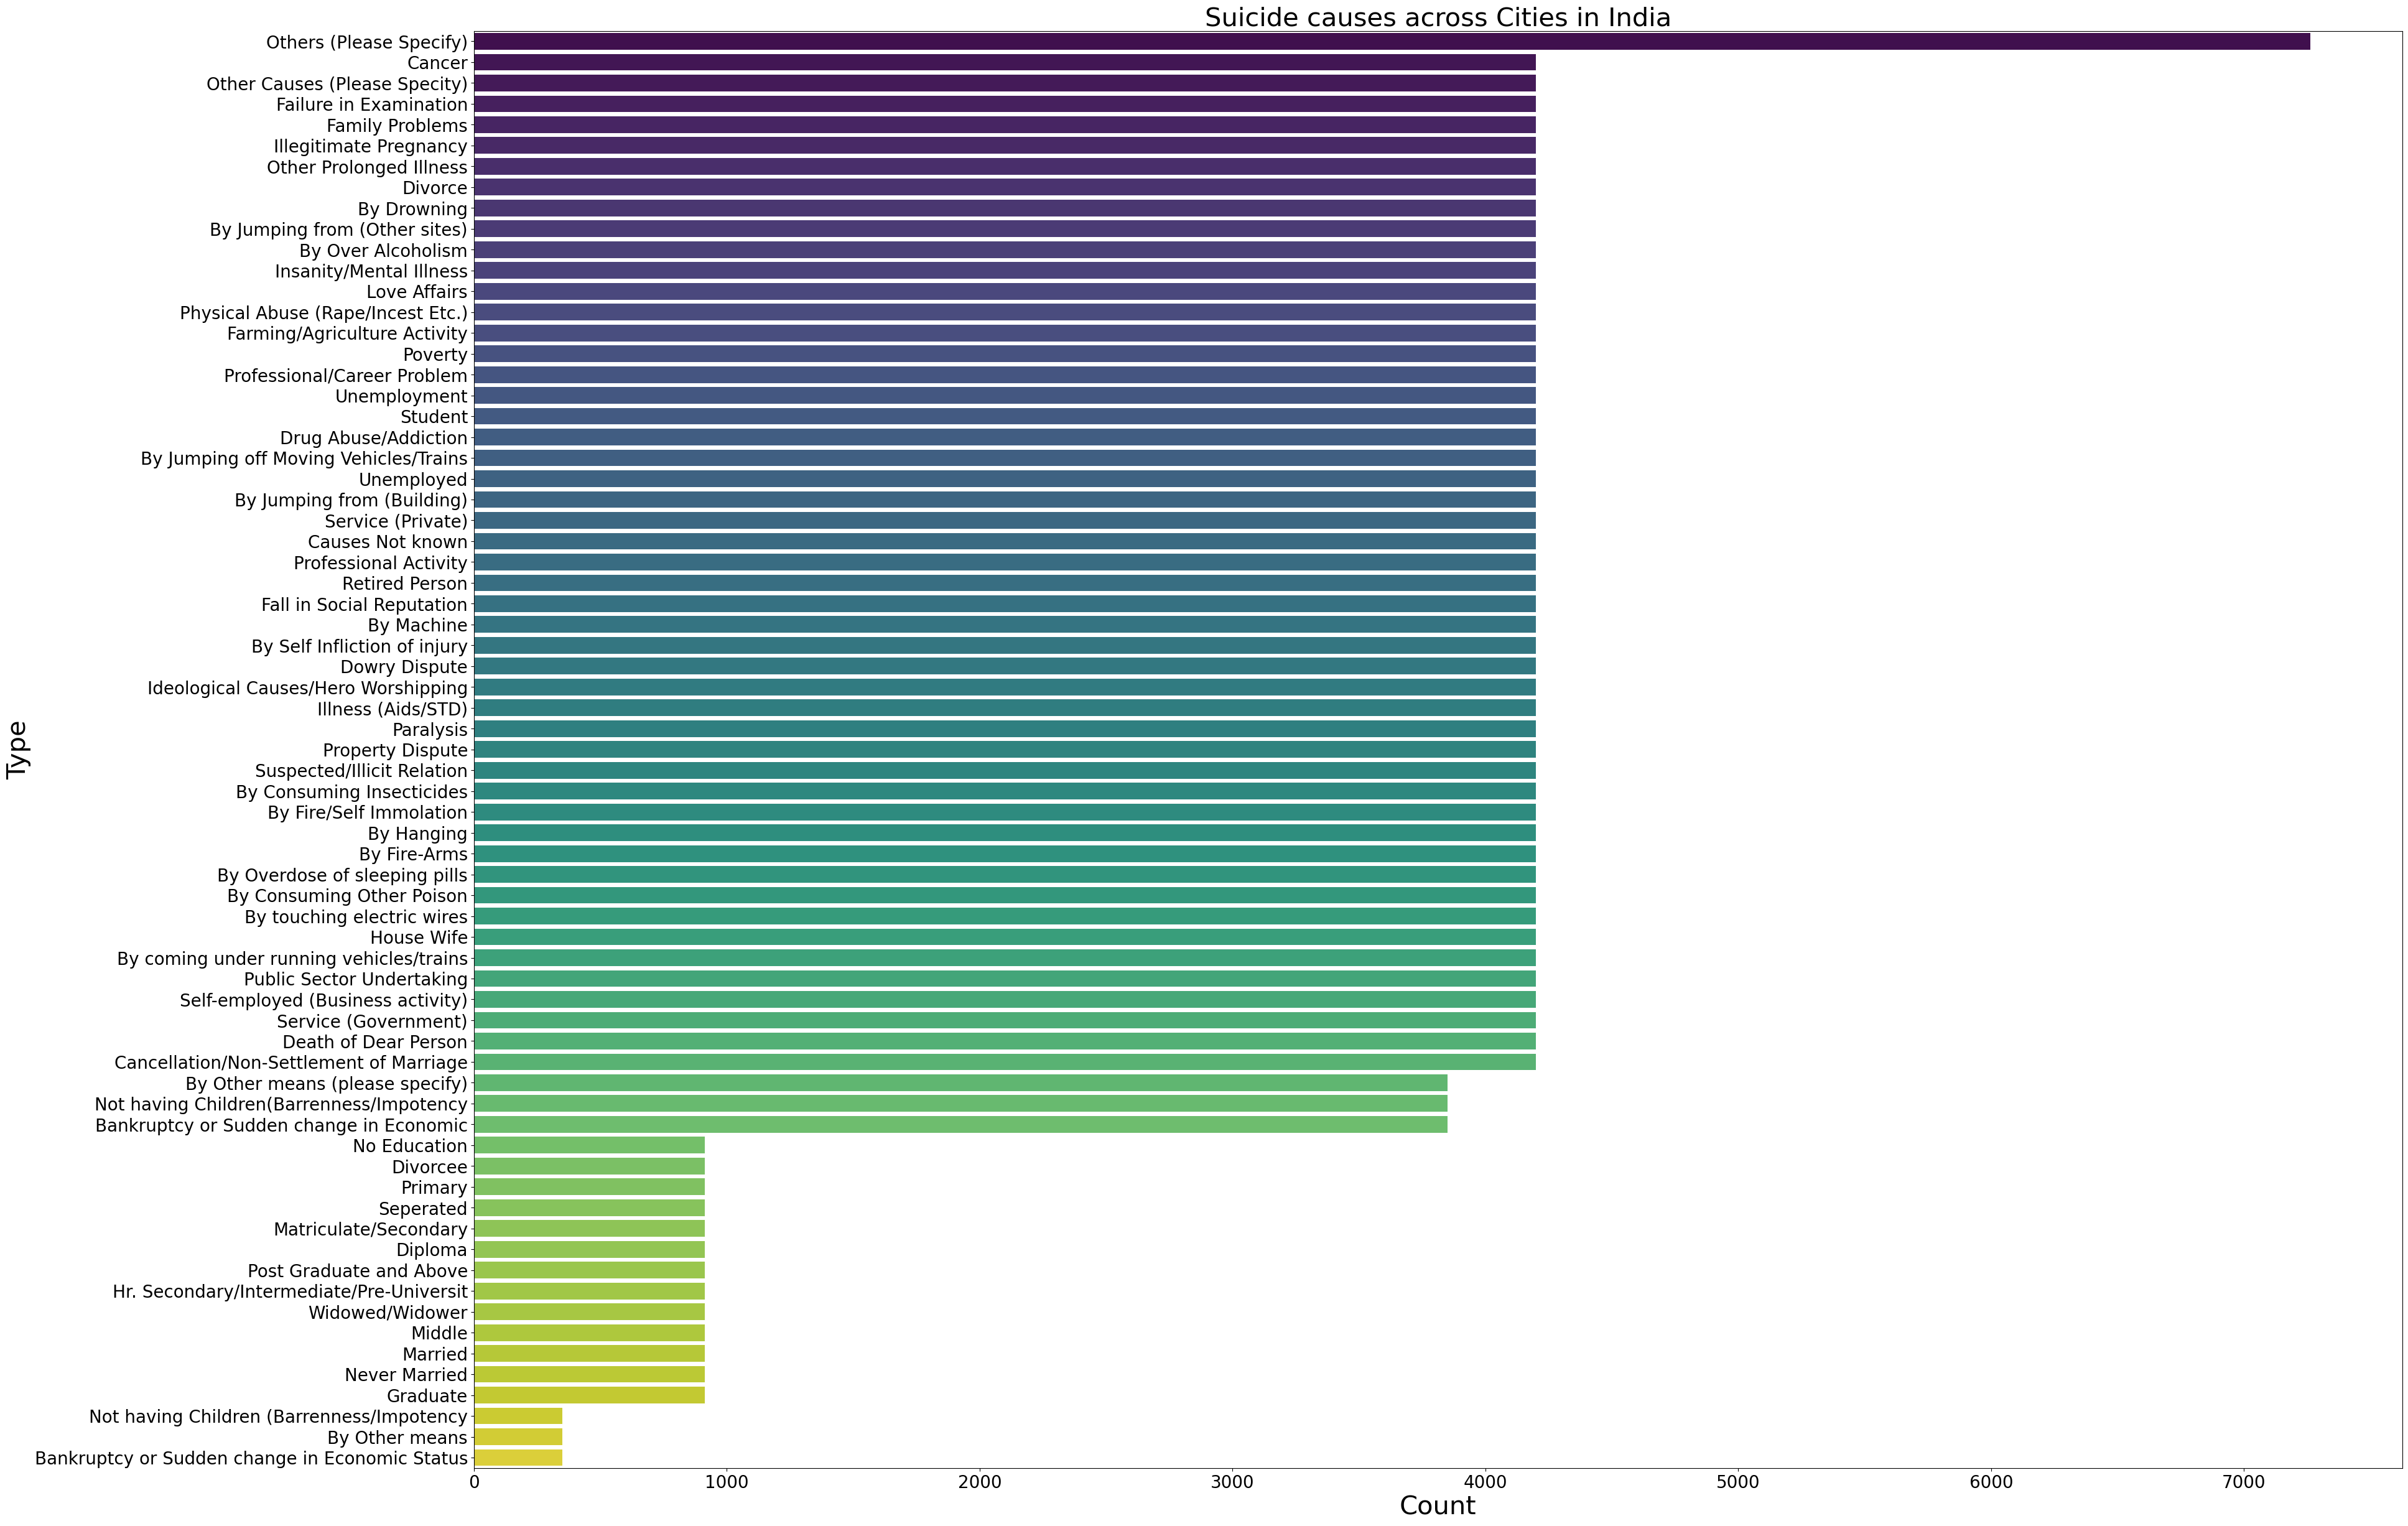

In [11]:
# Age distribution
plt.figure(figsize=(6,6))
plt.hist(df['Age_group'], bins=20, color='green')
plt.title('Age groups in India')
plt.xlabel('Age_group')
plt.ylabel('Count')
plt.show()

# City distribution
plt.figure(figsize=(40,30))
sns.countplot(y = 'Type', data = df, order = df['Type'].value_counts().index, palette = 'viridis')
plt.title('Suicide causes across Cities in India',fontsize=30)
plt.xlabel('Count',fontsize=30)
plt.ylabel('Type',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()



In [12]:
df.describe(include=['object'])

,State,Type_code,Type,Gender,Age_group
count,237519,237519,237519,237519,237519
unique,38,5,69,2,6
top,MADHYA PRADESH,Causes,Others (Please Specify),Male,15-29
freq,6792,109200,7263,118879,45223


In [13]:
#value_cpunts(),applies on panda series, so use single braket.
df['Type_code'].value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64

In [14]:
#makes it presentable
df['Type_code'].value_counts().to_frame()

,Type_code
Causes,109200
Means_adopted,67200
Professional_Profile,49263
Education_Status,7296
Social_Status,4560


In [15]:
df['State'].value_counts().to_frame()

,State
MADHYA PRADESH,6792
MAHARASHTRA,6792
KARNATAKA,6792
ODISHA,6791
ANDHRA PRADESH,6791
RAJASTHAN,6791
BIHAR,6790
CHHATTISGARH,6790
HARYANA,6790
KERALA,6788


In [16]:
type_cd = df['Type_code'].value_counts().to_frame()
type_cd.rename(columns={'Type_code':'Reasons'},inplace=True)
type_cd

,Reasons
Causes,109200
Means_adopted,67200
Professional_Profile,49263
Education_Status,7296
Social_Status,4560


In [17]:
type_cd.index.name='Type_code'
type_cd

,Reasons
Type_code,
Causes,109200
Means_adopted,67200
Professional_Profile,49263
Education_Status,7296
Social_Status,4560
